<a href="https://colab.research.google.com/github/raichalvarghese/Data_Science_Lab/blob/master/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How Naive Bayes algorithm works?
Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

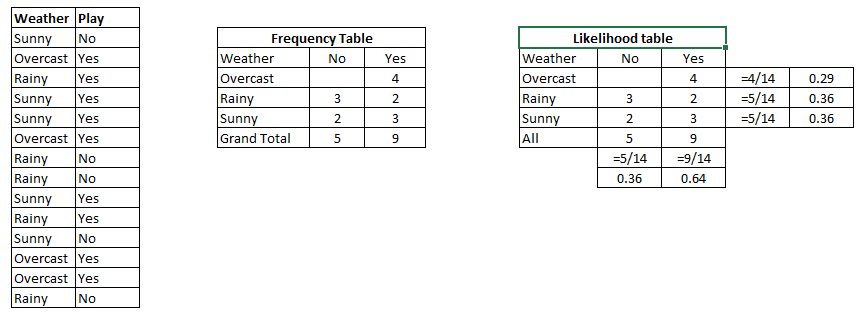

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

Problem: Players will play if weather is sunny. Is this statement is correct?

We can solve it using above discussed method of posterior probability.

P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.



##Applications of Naive Bayes Algorithms
Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.

Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.

Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)


Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not
 

##TYPES OF NAIVE BAYES MODEL

MultinomialNB: good for when your features(categorical or continuous) describe discrete frequency counts.

BernoulliNB: good for making predictions from binary features.

GaussianNB: Good for making predictions from normally distributed features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
dataset=pd.read_csv('IMDB dataset.csv')
dataset.sentiment.replace('positive',1,inplace=True)
dataset.sentiment.replace('negative',0,inplace=True)
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(dataset.drop('sentiment',axis=1))

ValueError: could not convert string to float: "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."

In [7]:
scaled_features=scaler.transform(dataset.drop('Species',axis=1))

In [8]:
new_dataset=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])

In [9]:
new_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956
146,1.651258,0.553333,-1.281972,0.705893,0.922064
147,1.674353,0.795669,-0.124958,0.819624,1.053537
148,1.697448,0.432165,0.800654,0.933356,1.447956


In [37]:
from sklearn.model_selection import train_test_split
X=dataset.drop('sentiment',axis=1)
y=dataset['sentiment']

In [38]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
scores = []
#GuassianNB
#Guassian Naive Bayes is used in cases when all our features are cases are continuous
#its features can have different values in data set as width and length can vary

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm 

ValueError: could not convert string to float: 'As much as I love trains, I couldn\'t stomach this movie. The premise that one could steal a locomotive and "drive" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the "crawler" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it\'s a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the "little guy takes on Goliath" story gets another airing.'

In [13]:
print(scores)

[1.0]


In [31]:

classifier1 = BernoulliNB()
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test) 
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

ValueError: could not convert string to float: 'As much as I love trains, I couldn\'t stomach this movie. The premise that one could steal a locomotive and "drive" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the "crawler" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it\'s a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the "little guy takes on Goliath" story gets another airing.'

In [15]:
print(scores)

[1.0, 0.8888888888888888]


In [16]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [32]:
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm 

ValueError: could not convert string to float: 'As much as I love trains, I couldn\'t stomach this movie. The premise that one could steal a locomotive and "drive" from Arkansas to Chicago without hitting another train along the way has to be right up there on the Impossible Plot lines hit board. Imagine two disgruntled NASA employees stealing the "crawler" that totes the shuttles to and fro and driving it to New York and you get the idea.<br /><br />Having said all that, it\'s a nice try. Wilford Brimely is at his Quaker Oats best, and Levon Helm turns a good performance as his dimwitted but well-meaning sidekick. Bob Balaban is suitably wormy as the Corporate Guy, and the "little guy takes on Goliath" story gets another airing.'

In [19]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [39]:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm 

ValueError: invalid literal for int() with base 10: 'As much as I love trains, I couldn\'t stomach this movie. The premise that one could steal a locomotive and "drive" from Arkansas to Chicago without hitting another train along the way has to be righ